# SED Test Patterns

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import cv2
import os


In [3]:

def create_blank(width, height, rgb_color=(0,0,0)):
    image = np.zeros((height, width, 3), np.uint8)
    
#     color = cv2.cvtColor(image, cv2.COLOR_RGB2GRAY)   
    color = tuple(reversed(rgb_color))
    image[:] = color

    return image


In [4]:
height, width = 720, 3840
red = (0, 0, 255)
green = (0, 255, 0)
blue = (255, 0, 0)
pink = (255, 0, 255)
white = (255, 255, 255)
black = (0, 0, 0)
gray16 = (15, 15, 15)
gray32 = (31, 31, 31)
gray64 = (63, 63, 63)
gray128 = (127, 127, 127)

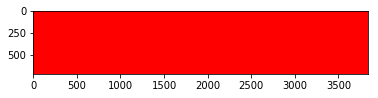

In [62]:
solid_red = create_blank(width, height, rgb_color=red)
cv2.imwrite("solid_red.bmp", solid_red)
plt.imshow(solid_red)


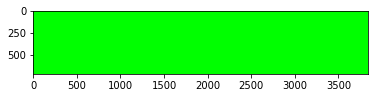

In [63]:
solid_green = create_blank(width, height, rgb_color=green)
cv2.imwrite("solid_green.bmp", solid_green)
plt.imshow(solid_green)


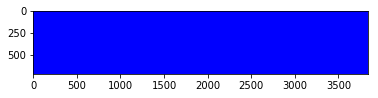

In [64]:
solid_blue = create_blank(width, height, rgb_color=blue)
cv2.imwrite("solid_blue.bmp", solid_blue)
plt.imshow(solid_blue)

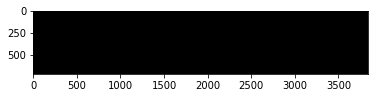

In [65]:
solid_black = create_blank(width, height, rgb_color=black)
cv2.imwrite("solid_black.bmp", solid_black)
plt.imshow(solid_black)


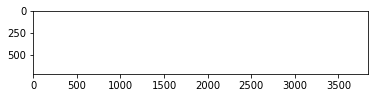

In [66]:
solid_white = create_blank(width, height, rgb_color=white)
cv2.imwrite("solid_white.bmp", solid_white)
plt.imshow(solid_white)


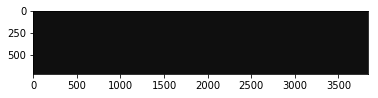

In [67]:
img_gray16 = create_blank(width, height, rgb_color=gray16)
cv2.imwrite("img_gray16.bmp", img_gray16)
plt.imshow(img_gray16)

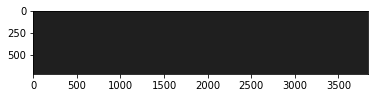

In [68]:
img_gray32 = create_blank(width, height, rgb_color=gray32)
cv2.imwrite("img_gray32.bmp", img_gray32)
plt.imshow(img_gray32)

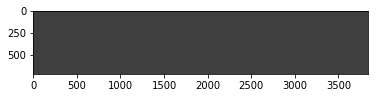

In [69]:
img_gray64 = create_blank(width, height, rgb_color=gray64)
cv2.imwrite("img_gray64.bmp", img_gray64)
plt.imshow(img_gray64)


True

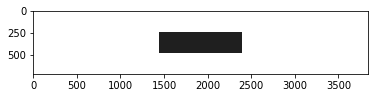

In [70]:
# Cross-talk

box_width = 959
box_height = 239

pts = np.array([[(width-box_width)/2, (height-box_height)/2], [(width-box_width)/2+box_width, (height-box_height)/2], [(width-box_width)/2+box_width, (height-box_height)/2+box_height], [(width-box_width)/2, (height-box_height)/2+box_height]])

img_crosstalk = create_blank(width, height, rgb_color=white)
img_crosstalk = cv2.fillPoly(img_crosstalk, np.int32([pts]), gray32)
plt.imshow(img_crosstalk)
cv2.imwrite("crosstalk.bmp", img_crosstalk)

True

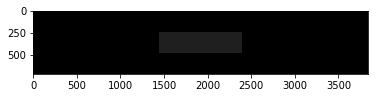

In [71]:
# Cross-talk Black

box_width = 959
box_height = 239

pts = np.array([[(width-box_width)/2, (height-box_height)/2], [(width-box_width)/2+box_width, (height-box_height)/2], [(width-box_width)/2+box_width, (height-box_height)/2+box_height], [(width-box_width)/2, (height-box_height)/2+box_height]])

img_crosstalk = create_blank(width, height, rgb_color=black)
img_crosstalk = cv2.fillPoly(img_crosstalk, np.int32([pts]), gray32)
plt.imshow(img_crosstalk)
cv2.imwrite("crosstalk_black.bmp", img_crosstalk)

True

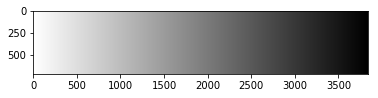

In [72]:
# Grayscale

box_width = int(width/256)
img_grayscale = create_blank(width, height, rgb_color=white)

for i in range(0, 256):
    color = [255-i, 255-i, 255-i]
    pts = np.array([[(i+0)*box_width, 0], [(i+1)*box_width, 0], [(i+1)*box_width, height], [(i+0)*box_width, height]])
    img_flicker = cv2.fillPoly(img_grayscale, np.int32([pts]), color)

plt.imshow(img_grayscale)
cv2.imwrite("grayscale.bmp", img_grayscale)


True

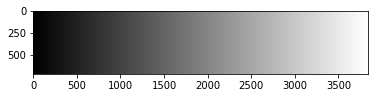

In [73]:
# Grayscale reversed

box_width = int(width/256)
img_grayscale_reversed = create_blank(width, height, rgb_color=white)

for i in range(0, 256):
    color = [i, i, i]
    pts = np.array([[(i+0)*box_width, 0], [(i+1)*box_width, 0], [(i+1)*box_width, height], [(i+0)*box_width, height]])
    img_flicker = cv2.fillPoly(img_grayscale_reversed, np.int32([pts]), color)

plt.imshow(img_grayscale_reversed)
cv2.imwrite("grayscale_reversed.bmp", img_grayscale_reversed)


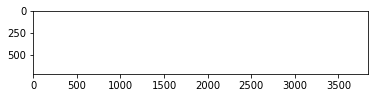

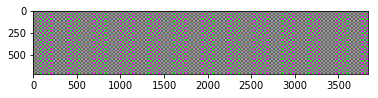

True

In [5]:
# Skip one dot


stress = create_blank(width, height, rgb_color=white)
plt.imshow(stress)
plt.show()

even_row_pixel_color = [[pink, green, pink],[green, pink, green]]
odd_row_pixel_color = [[green, pink, green], [pink, green, pink]]

for i in range(0, height):
    for j in range(0, width, 3):
        if i % 2 == 0: #even row
            stress[i,j] = even_row_pixel_color[j%2][0]
            stress[i, j+1] = even_row_pixel_color[j%2][1]
            stress[i, j+2] = even_row_pixel_color[j%2][2]
        else: # odd row
            stress[i,j] = odd_row_pixel_color[j%2][0]
            stress[i, j+1] = odd_row_pixel_color[j%2][1]
            stress[i, j+2] = odd_row_pixel_color[j%2][2]

        
plt.imshow(stress)
plt.show()
cv2.imwrite("skip_one_dot.bmp", stress)

# Checker (chess) pattern

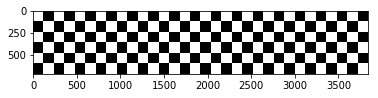

True

In [75]:
rows = 6
cols = 32

box_width = width/cols
box_height = height/rows
color = [white, black]
color_reversed = [black, white]

chess = create_blank(width, height, rgb_color=white)

for i in range(rows):
    for j in range(cols):
        pts = np.array([[(j+0)*box_width, (i+0)*box_height], [(j+1)*box_width, (i+0)*box_height], [(j+1)*box_width, (i+1)*box_height], [(j+0)*box_width, (i+1)*box_height]])
        if i%2 == 0:
            chess = cv2.fillPoly(chess, np.int32([pts]), color[j%2])
        else:
            chess = cv2.fillPoly(chess, np.int32([pts]), color_reversed[j%2])

plt.imshow(chess)
plt.show()
cv2.imwrite("32x6B.bmp", chess)


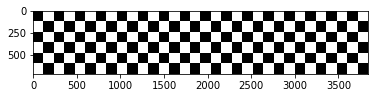

True

In [76]:
rows = 6
cols = 32

box_width = width/cols
box_height = height/rows
color = [white, black]
color_reversed = [black, white]

chess = create_blank(width, height, rgb_color=white)

for i in range(rows):
    for j in range(cols):
        pts = np.array([[(j+0)*box_width, (i+0)*box_height], [(j+1)*box_width, (i+0)*box_height], [(j+1)*box_width, (i+1)*box_height], [(j+0)*box_width, (i+1)*box_height]])
        if i%2 == 0:
            chess = cv2.fillPoly(chess, np.int32([pts]), color_reversed[j%2])
        else:
            chess = cv2.fillPoly(chess, np.int32([pts]), color[j%2])

plt.imshow(chess)
plt.show()
cv2.imwrite("32x6A.bmp", chess)


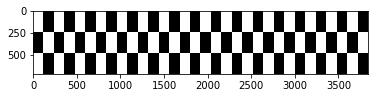

True

In [77]:
rows = 3
cols = 32

box_width = width/cols
box_height = height/rows
color = [white, black]
color_reversed = [black, white]

chess = create_blank(width, height, rgb_color=white)

for i in range(rows):
    for j in range(cols):
        pts = np.array([[(j+0)*box_width, (i+0)*box_height], [(j+1)*box_width, (i+0)*box_height], [(j+1)*box_width, (i+1)*box_height], [(j+0)*box_width, (i+1)*box_height]])
        if i%2 == 0:
            chess = cv2.fillPoly(chess, np.int32([pts]), color[j%2])
        else:
            chess = cv2.fillPoly(chess, np.int32([pts]), color_reversed[j%2])

plt.imshow(chess)
plt.show()
cv2.imwrite("32x3B.bmp", chess)


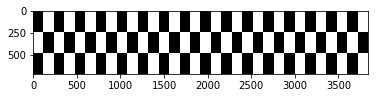

True

In [78]:
rows = 3
cols = 32

box_width = width/cols
box_height = height/rows
color = [white, black]
color_reversed = [black, white]

chess = create_blank(width, height, rgb_color=white)

for i in range(rows):
    for j in range(cols):
        pts = np.array([[(j+0)*box_width, (i+0)*box_height], [(j+1)*box_width, (i+0)*box_height], [(j+1)*box_width, (i+1)*box_height], [(j+0)*box_width, (i+1)*box_height]])
        if i%2 == 0:
            chess = cv2.fillPoly(chess, np.int32([pts]), color_reversed[j%2])
        else:
            chess = cv2.fillPoly(chess, np.int32([pts]), color[j%2])

plt.imshow(chess)
plt.show()
cv2.imwrite("32x3A.bmp", chess)


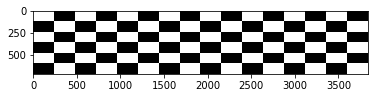

True

In [79]:
rows = 6
cols = 16

box_width = width/cols
box_height = height/rows
color = [white, black]
color_reversed = [black, white]

chess = create_blank(width, height, rgb_color=white)

for i in range(rows):
    for j in range(cols):
        pts = np.array([[(j+0)*box_width, (i+0)*box_height], [(j+1)*box_width, (i+0)*box_height], [(j+1)*box_width, (i+1)*box_height], [(j+0)*box_width, (i+1)*box_height]])
        if i%2 == 0:
            chess = cv2.fillPoly(chess, np.int32([pts]), color[j%2])
        else:
            chess = cv2.fillPoly(chess, np.int32([pts]), color_reversed[j%2])

plt.imshow(chess)
plt.show()
cv2.imwrite("16x6B.bmp", chess)


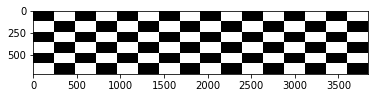

True

In [80]:
rows = 6
cols = 16

box_width = width/cols
box_height = height/rows
color = [white, black]
color_reversed = [black, white]

chess = create_blank(width, height, rgb_color=white)

for i in range(rows):
    for j in range(cols):
        pts = np.array([[(j+0)*box_width, (i+0)*box_height], [(j+1)*box_width, (i+0)*box_height], [(j+1)*box_width, (i+1)*box_height], [(j+0)*box_width, (i+1)*box_height]])
        if i%2 == 0:
            chess = cv2.fillPoly(chess, np.int32([pts]), color_reversed[j%2])
        else:
            chess = cv2.fillPoly(chess, np.int32([pts]), color[j%2])

plt.imshow(chess)
plt.show()
cv2.imwrite("16x6A.bmp", chess)


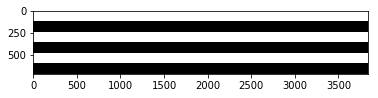

True

In [81]:
rows = 6
cols = 1

box_width = width/cols
box_height = height/rows
color = [white, black]
color_reversed = [black, white]

chess = create_blank(width, height, rgb_color=white)

for i in range(rows):
    for j in range(cols):
        pts = np.array([[(j+0)*box_width, (i+0)*box_height], [(j+1)*box_width, (i+0)*box_height], [(j+1)*box_width, (i+1)*box_height], [(j+0)*box_width, (i+1)*box_height]])
        if i%2 == 0:
            chess = cv2.fillPoly(chess, np.int32([pts]), color[j%2])
        else:
            chess = cv2.fillPoly(chess, np.int32([pts]), color_reversed[j%2])

plt.imshow(chess)
plt.show()
cv2.imwrite("1x6B.bmp", chess)


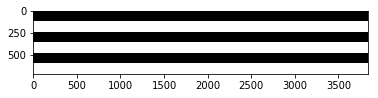

True

In [82]:
rows = 6
cols = 1

box_width = width/cols
box_height = height/rows
color = [white, black]
color_reversed = [black, white]

chess = create_blank(width, height, rgb_color=white)

for i in range(rows):
    for j in range(cols):
        pts = np.array([[(j+0)*box_width, (i+0)*box_height], [(j+1)*box_width, (i+0)*box_height], [(j+1)*box_width, (i+1)*box_height], [(j+0)*box_width, (i+1)*box_height]])
        if i%2 == 0:
            chess = cv2.fillPoly(chess, np.int32([pts]), color_reversed[j%2])
        else:
            chess = cv2.fillPoly(chess, np.int32([pts]), color[j%2])

plt.imshow(chess)
plt.show()
cv2.imwrite("1x6A.bmp", chess)


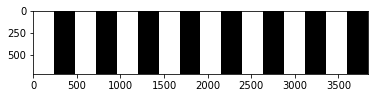

True

In [83]:
rows = 1
cols = 16

box_width = width/cols
box_height = height/rows
color = [white, black]
color_reversed = [black, white]

chess = create_blank(width, height, rgb_color=white)

for i in range(rows):
    for j in range(cols):
        pts = np.array([[(j+0)*box_width, (i+0)*box_height], [(j+1)*box_width, (i+0)*box_height], [(j+1)*box_width, (i+1)*box_height], [(j+0)*box_width, (i+1)*box_height]])
        if i%2 == 0:
            chess = cv2.fillPoly(chess, np.int32([pts]), color[j%2])
        else:
            chess = cv2.fillPoly(chess, np.int32([pts]), color_reversed[j%2])

plt.imshow(chess)
plt.show()
cv2.imwrite("16x1B.bmp", chess)


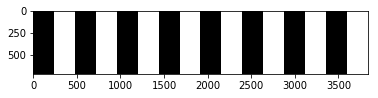

True

In [84]:
rows = 1
cols = 16

box_width = width/cols
box_height = height/rows
color = [white, black]
color_reversed = [black, white]

chess = create_blank(width, height, rgb_color=white)

for i in range(rows):
    for j in range(cols):
        pts = np.array([[(j+0)*box_width, (i+0)*box_height], [(j+1)*box_width, (i+0)*box_height], [(j+1)*box_width, (i+1)*box_height], [(j+0)*box_width, (i+1)*box_height]])
        if i%2 == 0:
            chess = cv2.fillPoly(chess, np.int32([pts]), color_reversed[j%2])
        else:
            chess = cv2.fillPoly(chess, np.int32([pts]), color[j%2])

plt.imshow(chess)
plt.show()
cv2.imwrite("16x1A.bmp", chess)

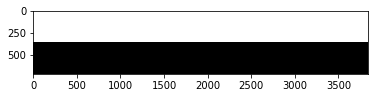

True

In [85]:
rows = 2
cols = 1

box_width = width/cols
box_height = height/rows
color = [white, black]
color_reversed = [black, white]

chess = create_blank(width, height, rgb_color=white)

for i in range(rows):
    for j in range(cols):
        pts = np.array([[(j+0)*box_width, (i+0)*box_height], [(j+1)*box_width, (i+0)*box_height], [(j+1)*box_width, (i+1)*box_height], [(j+0)*box_width, (i+1)*box_height]])
        if i%2 == 0:
            chess = cv2.fillPoly(chess, np.int32([pts]), color[j%2])
        else:
            chess = cv2.fillPoly(chess, np.int32([pts]), color_reversed[j%2])

plt.imshow(chess)
plt.show()
cv2.imwrite("1x2B.bmp", chess)


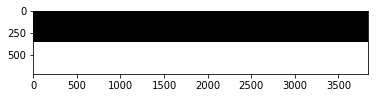

True

In [86]:
rows = 2
cols = 1

box_width = width/cols
box_height = height/rows
color = [white, black]
color_reversed = [black, white]

chess = create_blank(width, height, rgb_color=white)

for i in range(rows):
    for j in range(cols):
        pts = np.array([[(j+0)*box_width, (i+0)*box_height], [(j+1)*box_width, (i+0)*box_height], [(j+1)*box_width, (i+1)*box_height], [(j+0)*box_width, (i+1)*box_height]])
        if i%2 == 0:
            chess = cv2.fillPoly(chess, np.int32([pts]), color_reversed[j%2])
        else:
            chess = cv2.fillPoly(chess, np.int32([pts]), color[j%2])

plt.imshow(chess)
plt.show()
cv2.imwrite("1x2A.bmp", chess)


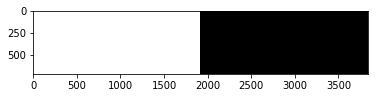

True

In [87]:
rows = 1
cols = 2

box_width = width/cols
box_height = height/rows
color = [white, black]
color_reversed = [black, white]

chess = create_blank(width, height, rgb_color=white)

for i in range(rows):
    for j in range(cols):
        pts = np.array([[(j+0)*box_width, (i+0)*box_height], [(j+1)*box_width, (i+0)*box_height], [(j+1)*box_width, (i+1)*box_height], [(j+0)*box_width, (i+1)*box_height]])
        if i%2 == 0:
            chess = cv2.fillPoly(chess, np.int32([pts]), color[j%2])
        else:
            chess = cv2.fillPoly(chess, np.int32([pts]), color_reversed[j%2])

plt.imshow(chess)
plt.show()
cv2.imwrite("2x1B.bmp", chess)


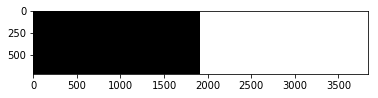

True

In [88]:
rows = 1
cols = 2

box_width = width/cols
box_height = height/rows
color = [white, black]
color_reversed = [black, white]

chess = create_blank(width, height, rgb_color=white)

for i in range(rows):
    for j in range(cols):
        pts = np.array([[(j+0)*box_width, (i+0)*box_height], [(j+1)*box_width, (i+0)*box_height], [(j+1)*box_width, (i+1)*box_height], [(j+0)*box_width, (i+1)*box_height]])
        if i%2 == 0:
            chess = cv2.fillPoly(chess, np.int32([pts]), color_reversed[j%2])
        else:
            chess = cv2.fillPoly(chess, np.int32([pts]), color[j%2])

plt.imshow(chess)
plt.show()
cv2.imwrite("2x1A.bmp", chess)

In [89]:
# test videos
# https://trac.ffmpeg.org/wiki/Slideshow

os.system("ffmpeg -framerate 1/2 -pattern_type glob -i '*.bmp' -r 60 test.mp4")


0

In [90]:
# Stress test videos

os.system("ffmpeg -loop 1 -i stress.bmp -t 60 stress.mp4")

256

In [58]:
# Did NOT work
# create a video using opencv
# https://www.learnopencv.com/read-write-and-display-a-video-using-opencv-cpp-python/

img1 = cv2.imread('crosstalk.bmp')
img2 = cv2.imread('crosstalk_black.bmp')
img3 = cv2.imread('flicker.bmp')
img4 = cv2.imread('grayscale.bmp')

height, width, layers = img1.shape

video = cv2.VideoWriter('test.avi', -1, 1, (width, height))
video.write(img1)
video.write(img2)
video.write(img3)
video.write(img4)

# cv2.destroyAllWindows()
video.release()

In [12]:
# https://docs.opencv.org/2.4/modules/highgui/doc/user_interface.html#imshow


name = "48\'\' SED Visual Inspection"
cv2.namedWindow(name)
cv2.imshow(name, solid_blue) 
cv2.waitKey(10)
cv2.destroyAllWindows()